In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from statistics import mean 

In [2]:
FILE_PATH = 'data/exp1_main.json'
all_entries = []
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries.append(entry)
        e = entry['data']
len(all_entries)

2005

In [13]:
start = []
finish = []
for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']
        start.append(entry)
    else:
        condition = entry['data'][0]
        finish.append(entry)
print(len(start),len(finish))

def return_indices(user_order): #function that searches through the list of anagrams and returns the indices of the anagrams seen by the subject
    order = ['TEH', 'WYH', 'CPA', 'YSE', 'CPU','FNU', 'EEY', 'SNU', 'HTA', 'CNA', 'HTE', 'HWY', 'APC', 'EYS', 'PCU', 'NUF', 'YEE', 'UNS', 'AHT', 'ACN', 'WODR', 'DDEE', 'BLLE', 'STRO', 'PTIN', 'BTEL', 'CADR', 'FNDI', 'YLEL', 'CDOL','OWDR', 'EDDE', 'LBLE', 'TOSR', 'TIPN', 'TBLE', 'RADC', 'DIFN', 'LYLE','DOCL', 'VENGA','CLREK','PEOKR','OSIAS','GIATN','OUIPM','DONRO','PHNEO','ECELT','SCELA', 'EVANG', 'KLECR','KOERP','SAOSI','IGNAT','POUIM','OONRD','NPOHE','TELCE','ESALC', 'SADOWH','DOLRLA','RAODNM','SALYRA','WEIGTH','RDFUNE','LEETTR','CRABON','WIZRAD','BLLAET', 'HSOADW', 'RODLLA','MARNOD','AALRYS','IEGWHT','UEFNDR','RETLET','NCRBOA','ZIAWRD','EABLLT', 'CLEIMAT','JWAYALK','HAKMOCM','DURAELB','NAYUGHT','GLICAER','JLUMBED','EXPLIAN','GBRAAGE','JNOUREY', 'TCILAME','AYKAWLJ','CAMHOMK','EURADBL','AYUGNHT','CLAIGER','LUBMEJD','AXPLINE','BARAGGE','YUOEJRN']
    idx = []
    for i in range(len(user_order)):
        idx.append(order.index(user_order[i]))
    return idx

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    #print(a)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

1074 931


In [16]:
#get subject data for the 100 anagrams

time_guess = [[] for i in range(100)] 
actual_rt = [[] for i in range(100)]
give_up = [[] for i in range(100)]
aha = [[] for i in range(100)]

for entry in finish: 
    entry_data = entry['data']
    idx = return_indices((entry_data[0]['anagrams_seen'])) #get the indices of the anagrams seen by the subject
    anagrams_answers = entry_data[0]['anagrams_answers']
    
    counter = 3 #3 is first time quiz is given to subjects
    while '5' not in entry_data[counter]['responses']: #keep increasing counter everytime subject gets the quiz incorrectly
        counter = counter+2
    
    for j in range(5):
        counter = counter+3
        time_guess[idx[j]].append(entry_data[counter]['response'])

        counter = counter+1  
        rt = entry_data[counter]['rt']
        attempt = entry_data[counter]['responses'] 
        g = 0

        while anagrams_answers[j].lower() not in attempt.lower(): #keep incrementing until person gets correct answer or gives up
            if "next" in attempt.lower(): #break if person gave up
                g = 1
                break
            else:                
                counter = counter+1
                attempt = entry_data[counter]['responses']
                rt = rt+entry_data[counter]['rt']  

        give_up[idx[j]].append(g) #did subject give up or not
        actual_rt[idx[j]].append(rt) #append actual time to complete

        counter = counter+1    
        r = entry_data[counter]['responses'] #aha rating
        aha[idx[j]].append(int(r[6]))


In [26]:
#data conversion, clean-up, and storage here
anagrams = order = ['TEH', 'WYH', 'CPA', 'YSE', 'CPU','FNU', 'EEY', 'SNU', 'HTA', 'CNA', 'HTE', 'HWY', 'APC', 'EYS', 'PCU', 'NUF', 'YEE', 'UNS', 'AHT', 'ACN', 'WODR', 'DDEE', 'BLLE', 'STRO', 'PTIN', 'BTEL', 'CADR', 'FNDI', 'YLEL', 'CDOL','OWDR', 'EDDE', 'LBLE', 'TOSR', 'TIPN', 'TBLE', 'RADC', 'DIFN', 'LYLE','DOCL', 'VENGA','CLREK','PEOKR','OSIAS','GIATN','OUIPM','DONRO','PHNEO','ECELT','SCELA', 'EVANG', 'KLECR','KOERP','SAOSI','IGNAT','POUIM','OONRD','NPOHE','TELCE','ESALC', 'SADOWH','DOLRLA','RAODNM','SALYRA','WEIGTH','RDFUNE','LEETTR','CRABON','WIZRAD','BLLAET', 'HSOADW', 'RODLLA','MARNOD','AALRYS','IEGWHT','UEFNDR','RETLET','NCRBOA','ZIAWRD','EABLLT', 'CLEIMAT','JWAYALK','HAKMOCM','DURAELB','NAYUGHT','GLICAER','JLUMBED','EXPLIAN','GBRAAGE','JNOUREY', 'TCILAME','AYKAWLJ','CAMHOMK','EURADBL','AYUGNHT','CLAIGER','LUBMEJD','AXPLINE','BARAGGE','YUOEJRN']
mean_time_guess = []
mean_rt = []
mean_tpe = []
mean_aha = []
mean_tpe2 = []
mean_aha2 = []

for i in range(100): #go through all 100 anagrams here
    give_up_i = give_up[i]
    aha_i = aha[i]    
    time_guess_i = np.asarray(time_guess[i], dtype='float64')*(3/100)*(60) 
    actual_rt_i = np.asarray(actual_rt[i], dtype='float64')*0.001  
    tpe_i = (time_guess_i-actual_rt_i)
    
    indexes = [i for i,x in enumerate(give_up_i) if x == 0] #only get subjects who solved the anagram    
    aha_i = np.asarray(aha_i)
    aha_i = aha_i[np.asarray(indexes)] 
    time_guess_i = time_guess_i[np.asarray(indexes)] 
    actual_rt_i = actual_rt_i[np.asarray(indexes)] 
    tpe_i = tpe_i[np.asarray(indexes)]
    
    mean_time_guess.append(np.mean(time_guess_i/60))
    mean_rt.append(np.mean(actual_rt_i/60))
    mean_tpe.append(np.mean(tpe_i/60))
    mean_aha.append(np.mean(aha_i))
    mean_tpe2.append(tpe_i/60) #this is for power analysis later on
    mean_aha2.append(aha_i)
    #print('Time guess:', np.mean(time_guess_i), 'Actual RT:',np.mean(actual_rt_i), 'TPE:', np.mean(tpe_i), 'AHA:',np.mean(aha_i), 'numSubs:', len(aha_i))
    print('Anagram:', anagrams[i], 'numSubs:', len(aha_i))
    


Anagram: TEH numSubs: 54
Anagram: WYH numSubs: 52
Anagram: CPA numSubs: 36
Anagram: YSE numSubs: 44
Anagram: CPU numSubs: 37
Anagram: FNU numSubs: 41
Anagram: EEY numSubs: 46
Anagram: SNU numSubs: 55
Anagram: HTA numSubs: 62
Anagram: CNA numSubs: 53
Anagram: HTE numSubs: 44
Anagram: HWY numSubs: 34
Anagram: APC numSubs: 39
Anagram: EYS numSubs: 53
Anagram: PCU numSubs: 52
Anagram: NUF numSubs: 41
Anagram: YEE numSubs: 41
Anagram: UNS numSubs: 48
Anagram: AHT numSubs: 47
Anagram: ACN numSubs: 42
Anagram: WODR numSubs: 56
Anagram: DDEE numSubs: 46
Anagram: BLLE numSubs: 57
Anagram: STRO numSubs: 47
Anagram: PTIN numSubs: 44
Anagram: BTEL numSubs: 47
Anagram: CADR numSubs: 44
Anagram: FNDI numSubs: 38
Anagram: YLEL numSubs: 47
Anagram: CDOL numSubs: 60
Anagram: OWDR numSubs: 37
Anagram: EDDE numSubs: 35
Anagram: LBLE numSubs: 33
Anagram: TOSR numSubs: 51
Anagram: TIPN numSubs: 46
Anagram: TBLE numSubs: 47
Anagram: RADC numSubs: 39
Anagram: DIFN numSubs: 40
Anagram: LYLE numSubs: 47
Anagra

In [23]:
print(np.corrcoef(mean_tpe, mean_aha))
print(np.corrcoef(mean_rt, mean_aha))
print(np.corrcoef(mean_rt, mean_tpe))
print(np.corrcoef(mean_time_guess, mean_tpe))
print(np.corrcoef(mean_time_guess, mean_aha))

[[1.         0.63630356]
 [0.63630356 1.        ]]
[[1.         0.56134385]
 [0.56134385 1.        ]]
[[1.         0.49834323]
 [0.49834323 1.        ]]
[[1.         0.76001402]
 [0.76001402 1.        ]]
[[1.         0.74087635]
 [0.74087635 1.        ]]


[(0.0, 1.5)]

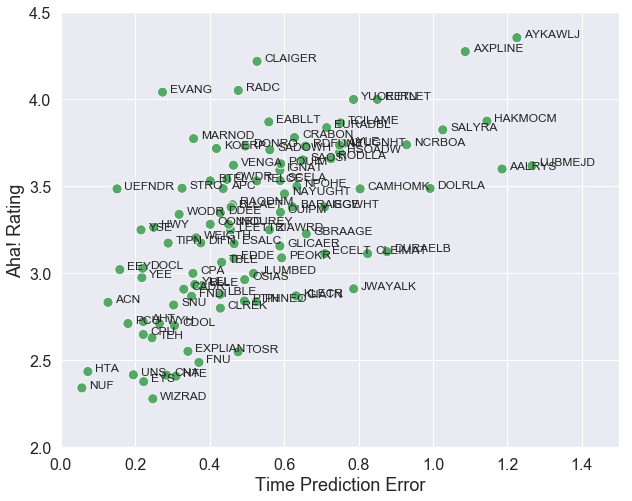

In [27]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
n = 16
plt.rcParams.update({'font.size': n})
sns.set()

df = pd.DataFrame({'anagrams': ['TEH', 'WYH', 'CPA', 'YSE', 'CPU','FNU', 'EEY', 'SNU', 'HTA', 'CNA', 'HTE', 'HWY', 'APC', 'EYS', 'PCU', 'NUF', 'YEE', 'UNS', 'AHT', 'ACN', 'WODR', 'DDEE', 'BLLE', 'STRO', 'PTIN', 'BTEL', 'CADR', 'FNDI', 'YLEL', 'CDOL','OWDR', 'EDDE', 'LBLE', 'TOSR', 'TIPN', 'TBLE', 'RADC', 'DIFN', 'LYLE','DOCL', 'VENGA','CLREK','PEOKR','OSIAS','GIATN','OUIPM','DONRO','PHNEO','ECELT','SCELA', 'EVANG', 'KLECR','KOERP','SAOSI','IGNAT','POUIM','OONRD','NPOHE','TELCE','ESALC', 'SADOWH','DOLRLA','RAODNM','SALYRA','WEIGTH','RDFUNE','LEETTR','CRABON','WIZRAD','BLLAET', 'HSOADW', 'RODLLA','MARNOD','AALRYS','IEGWHT','UEFNDR','RETLET','NCRBOA','ZIAWRD','EABLLT', 'CLEIMAT','JWAYALK','HAKMOCM','DURAELB','NAYUGHT','GLICAER','JLUMBED','EXPLIAN','GBRAAGE','JNOUREY', 'TCILAME','AYKAWLJ','CAMHOMK','EURADBL','AYUGNHT','CLAIGER','LUBMEJD','AXPLINE','BARAGGE','YUOEJRN'],
    'tpe': mean_tpe,
    'aha': mean_aha,
    'estimate': mean_time_guess,
     'rt':  mean_rt})

sns_plot = sns.scatterplot('tpe', 'aha', size="aha",  color = 'g', sizes=(100, 100), legend=False, data=df)
label_point(df['tpe'], df['aha'], df['anagrams'] , plt.gca()) #function to label point in scatter plot
plt.gcf().set_size_inches(10, 8)
plt.tick_params(labelsize=n)
plt.xlabel(xlabel='Time Prediction Error', size=n+2)
plt.ylabel(ylabel='Aha! Rating', size=n+2)
sns_plot.set(ylim=(2.0, 4.5))
sns_plot.set(xlim=(0.0, 1.5))

[(0, 1.6)]

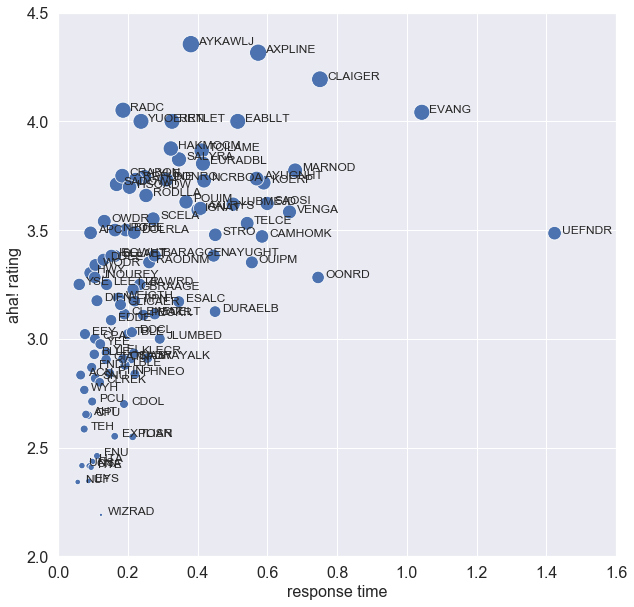

In [93]:
sns_plot = sns.scatterplot('rt', 'aha', size="aha", sizes=(10, 300), legend=False, data=df)
label_point(df['rt'], df['aha'], df['anagrams'] , plt.gca()) #function to label point in scatter plot
plt.gcf().set_size_inches(10, 10)
plt.tick_params(labelsize=n)
plt.xlabel(xlabel='response time', size=n)
plt.ylabel(ylabel='aha! rating', size=n)
sns_plot.set(ylim=(2, 4.5))
sns_plot.set(xlim=(0, 1.6))

[(0, 1.8)]

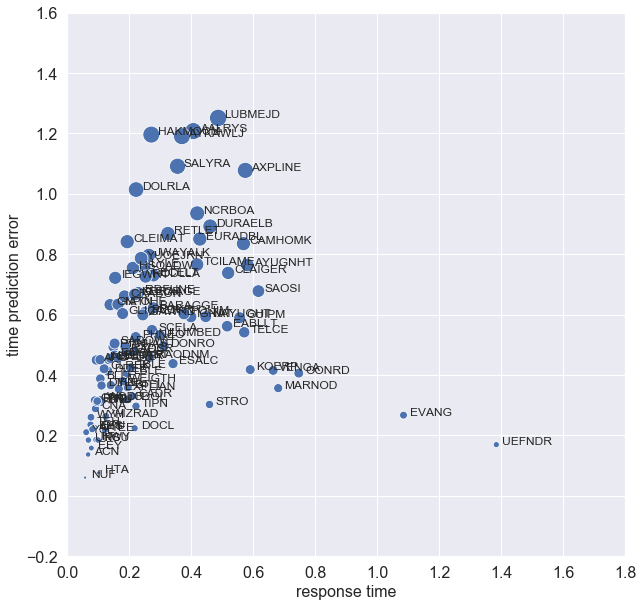

In [62]:
sns_plot = sns.scatterplot('rt', 'tpe', size="tpe", sizes=(10, 300), legend=False, data=df)
label_point(df['rt'], df['tpe'], df['anagrams'] , plt.gca()) #function to label point in scatter plot
plt.gcf().set_size_inches(10, 10)
plt.tick_params(labelsize=n)
plt.xlabel(xlabel='response time', size=n)
plt.ylabel(ylabel='time prediction error', size=n)
sns_plot.set(ylim=(-0.2, 1.6))
sns_plot.set(xlim=(0, 1.8))

[(0, 2.0)]

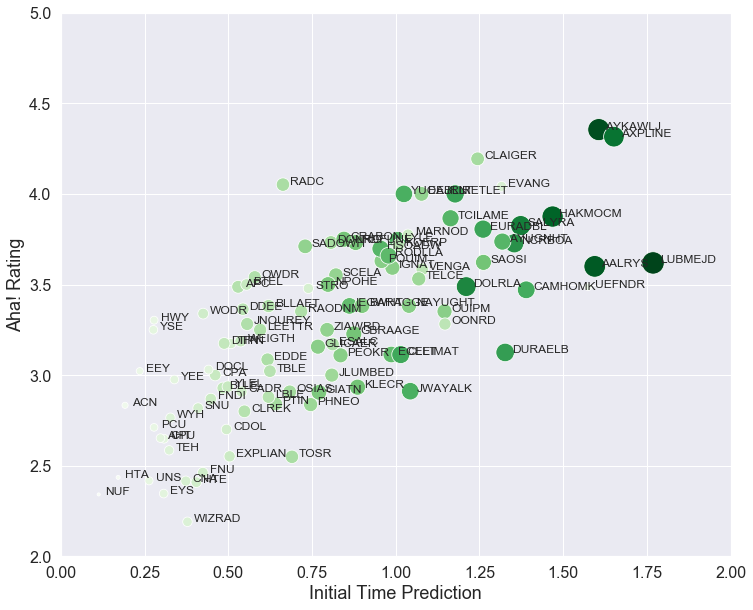

In [94]:
sns_plot = sns.scatterplot('estimate', 'aha', size="tpe", hue="tpe", 
                           sizes=(10, 500), palette="Greens", legend=False, data=df)
label_point(df['estimate'], df['aha'], df['anagrams'] , plt.gca()) #function to label point in scatter plot
plt.gcf().set_size_inches(12, 10)
plt.tick_params(labelsize=n)
plt.xlabel(xlabel='Initial Time Prediction', size=n+2)
plt.ylabel(ylabel='Aha! Rating', size=n+2)
sns_plot.set(ylim=(2.0, 5.0))
sns_plot.set(xlim=(0, 2.0))

[(0, 2.0)]

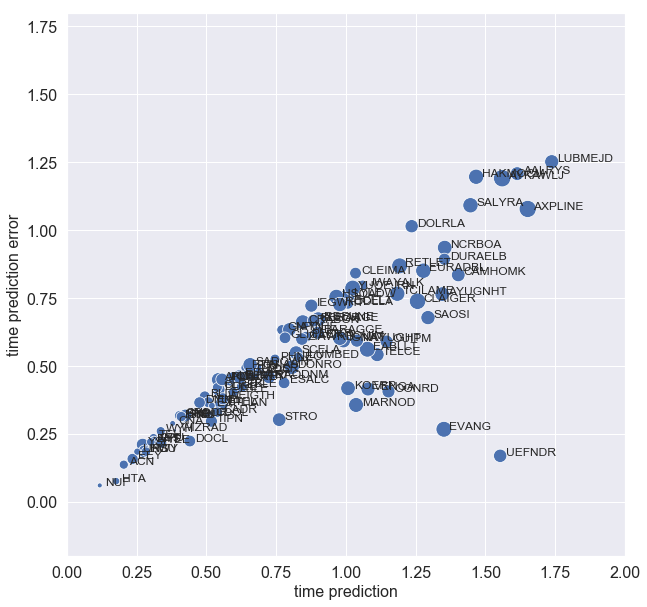

In [64]:
sns_plot = sns.scatterplot('estimate', 'tpe', size="aha", sizes=(10, 300), legend=False, data=df)
label_point(df['estimate'], df['tpe'], df['anagrams'] , plt.gca()) #function to label point in scatter plot
plt.gcf().set_size_inches(10, 10)
plt.tick_params(labelsize=n)
plt.xlabel(xlabel='time prediction', size=n)
plt.ylabel(ylabel='time prediction error', size=n)
sns_plot.set(ylim=(-0.2, 1.8))
sns_plot.set(xlim=(0, 2.0))

In [13]:
# regression analysis
from scipy import stats
import statsmodels.api as sm


all_predictors = ['estimate', 'rt', 'tpe']
X = df[all_predictors]
y = mean_aha
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     59.02
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.70e-17
Time:                        18:28:26   Log-Likelihood:                -28.211
No. Observations:                 100   AIC:                             62.42
Df Residuals:                      97   BIC:                             70.24
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5248      0.077     32.865      0.000       2.372       2.677
estimate       0.6186      0.058     10.726      0.000       0.504       0.733
rt             0.3027      0.121      2.493      0.014       0.062       0.544
tpe            0.3159      0.113      2.800      0.006       0.092       0.540
==============================================================================
Omnibus:                        1.993   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.433
Skew:                           0.014   Prob(JB):                        0.489
Kurtosis:                       2.414   Cond. No.                     1.54e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.79e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [12]:
# interaction effect analysis
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula='aha ~ tpe+rt+estimate+estimate:tpe', data=df).fit()
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    aha   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     41.18
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.39e-17
Time:                        17:54:02   Log-Likelihood:                -26.654
No. Observations:                 100   AIC:                             61.31
Df Residuals:                      96   BIC:                             71.73
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.3190      0.140     16.512      0.000       2.040       2.598
tpe              0.7742      0.286      2.710      0.008       0.207       1.341
rt               0.1551      0.147      1.055      0.294      -0.137       0.447
estimate         0.9292      0.187      4.964      0.000       0.558       1.301
estimate:tpe    -0.4812      0.276     -1.743      0.085      -1.029       0.067
==============================================================================
Omnibus:                        1.878   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.385
Skew:                          -0.021   Prob(JB):                        0.500
Kurtosis:                       2.425   Cond. No.                     1.33e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Likelihood:         -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.394    2.149                            

